In [1]:
from KMeans import *
from openml.datasets import list_datasets, get_datasets
import pandas as pd
import warnings

## Dataset retrieval

In [16]:
search = True
if search:
    query = "NumberOfInstances > 100000 &\
             NumberOfInstances < 1000000 &\
             NumberOfFeatures < 1000 &\
             NumberOfNumericFeatures > 3 &\
             NumberOfNumericFeatures < 25 &\
             NumberOfMissingValues == 0 &\
             NumberOfSymbolicFeatures == 0"

    dataset_dataframe = list_datasets(output_format="dataframe").query(query)
    dataset_dataframe = dataset_dataframe.drop_duplicates(['name']).drop_duplicates(['NumberOfNumericFeatures']).sort_values(by=['NumberOfNumericFeatures'])
    dataset_ids = dataset_dataframe['did'][:10]
    dataset_ids.to_csv('./data/dataset_ids.csv', index=False)
dataset_ids = pd.read_csv('./data/dataset_ids.csv')['did']
dataset_list = get_datasets(dataset_ids=dataset_ids)
X_list = [dataset.get_data()[0].select_dtypes([np.number]).to_numpy() for dataset in dataset_list]

## Measurements basic k-means

In [3]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    i = 0
    df_measurements = pd.DataFrame(columns=['n_datapoints', 'n_features', 'n_clusters', 't_A_avg', 't_A_min', 't_A_max', 't_B_avg', 't_B_min', 't_B_max', 'avg_cluster_size', 'min_cluster_size', 'max_cluster_size'])
    for k, X in enumerate(X_list):
        print(f"Processing {k}° dataset...")
        for K in range(3, 15):
            # Fit kmeans
            kmeans = KMeans_fast(X, n_clusters = K)
            A_time, B_time = kmeans.fit(measure=True)
            # Get cluster size
            clusters_size = kmeans.getClustersSize()
            # Append to df
            df_measurements.loc[i] = [X.shape[0], X.shape[1], K, np.mean(A_time), np.min(A_time), np.max(A_time), np.mean(B_time), np.min(B_time), np.max(B_time), np.nanmean(clusters_size), np.nanmin(clusters_size), np.nanmax(clusters_size)]
            i += 1
    df_measurements.to_csv('./data/measurements.csv', index=False)

Processing 0° dataset...
Processing 1° dataset...
Processing 2° dataset...
Processing 3° dataset...
Processing 4° dataset...
Processing 5° dataset...
Processing 6° dataset...
Processing 7° dataset...
Processing 8° dataset...
Processing 9° dataset...


In [5]:
df_measurements['ratio_AB_avg'] = df_measurements['t_A_avg']/df_measurements['t_B_avg']
df_measurements['ratio_AB_max'] = df_measurements['t_A_max']/df_measurements['t_B_max']
df_measurements['ratio_AB_min'] = df_measurements['t_A_min']/df_measurements['t_B_min']

array([[<AxesSubplot:title={'center':'ratio_AB_avg'}>,
        <AxesSubplot:title={'center':'ratio_AB_max'}>]], dtype=object)

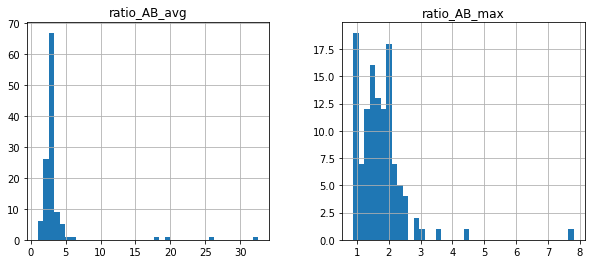

In [16]:
df_measurements[['ratio_AB_avg', 'ratio_AB_max']][(df_measurements[['ratio_AB_avg', 'ratio_AB_max']] != np.inf).any(axis=1)].hist(column=['ratio_AB_avg', 'ratio_AB_max'], bins=40, figsize=(10,4))

<AxesSubplot:xlabel='n_clusters', ylabel='ratio_AB_avg'>

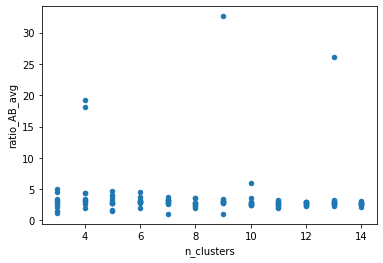

In [7]:
df_measurements.plot(x='n_clusters', y='ratio_AB_avg', kind='scatter')

<AxesSubplot:xlabel='avg_cluster_size', ylabel='ratio_AB_avg'>

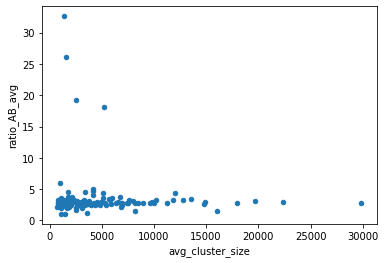

In [8]:
df_measurements.plot(x='avg_cluster_size', y='ratio_AB_avg', kind='scatter')

<AxesSubplot:xlabel='n_features', ylabel='ratio_AB_avg'>

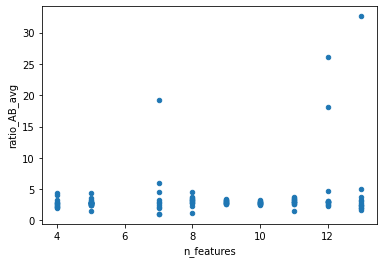

In [9]:
df_measurements.plot(x='n_features', y='ratio_AB_avg', kind='scatter')

In [10]:
df_measurements

,n_datapoints,n_features,n_clusters,t_A_avg,t_A_min,t_A_max,t_B_avg,t_B_min,t_B_max,avg_cluster_size,min_cluster_size,max_cluster_size,ratio_AB_avg,ratio_AB_max,ratio_AB_min
0,20648.0,4.0,3.0,0.004456,0.0,0.008799,0.002121,0.0,0.008445,6882.666667,383.0,16698.0,2.100560,1.041897,NaN
1,20648.0,4.0,4.0,0.006714,0.0,0.015665,0.001528,0.0,0.011007,5162.000000,383.0,16117.0,4.394244,1.423212,NaN
2,20648.0,4.0,5.0,0.006556,0.0,0.021180,0.001621,0.0,0.015671,4129.600000,382.0,15296.0,4.043655,1.351478,NaN
3,20648.0,4.0,6.0,0.007334,0.0,0.027657,0.002653,0.0,0.017639,3441.333333,260.0,13508.0,2.763997,1.567990,NaN
4,20648.0,4.0,7.0,0.007150,0.0,0.017610,0.002671,0.0,0.015674,2949.714286,93.0,8796.0,2.676900,1.123547,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,12455.0,13.0,10.0,0.012099,0.0,0.017092,0.004943,0.0,0.019301,1245.500000,23.0,2181.0,2.447443,0.885517,NaN
116,12455.0,13.0,11.0,0.012139,0.0,0.020172,0.006075,0.0,0.015678,1132.272727,854.0,1394.0,1.998266,1.286622,NaN
117,12455.0,13.0,12.0,0.013455,0.0,0.022668,0.005279,0.0,0.015688,1037.916667,23.0,1769.0,2.548567,1.444946,NaN
118,12455.0,13.0,13.0,0.013913,0.0,0.026188,0.006192,0.0,0.016112,958.076923,23.0,1931.0,2.246956,1.625396,NaN


In [11]:
df_measurements['ratio_max_min_cluster_size'] = df_measurements['max_cluster_size']/df_measurements['min_cluster_size']
df_measurements.sort_values(['ratio_max_min_cluster_size'], ascending=False)

,n_datapoints,n_features,n_clusters,t_A_avg,t_A_min,t_A_max,t_B_avg,t_B_min,t_B_max,avg_cluster_size,min_cluster_size,max_cluster_size,ratio_AB_avg,ratio_AB_max,ratio_AB_min,ratio_max_min_cluster_size
102,20867.0,12.0,9.0,0.018515,0.008548,0.031259,0.006106,0.0,0.015702,2318.555556,1.0,5379.0,3.032476,1.990708,inf,5379.000000
62,22784.0,9.0,5.0,0.011067,0.000000,0.024338,0.003906,0.0,0.015639,4556.800000,3.0,15916.0,2.833392,1.556216,NaN,5305.333333
103,20867.0,12.0,10.0,0.019215,0.008644,0.031733,0.006616,0.0,0.019672,2086.700000,1.0,5210.0,2.904165,1.613126,inf,5210.000000
105,20867.0,12.0,12.0,0.021335,0.007075,0.032320,0.007135,0.0,0.016118,1738.916667,1.0,4743.0,2.990204,2.005251,inf,4743.000000
104,20867.0,12.0,11.0,0.021280,0.008405,0.035311,0.006788,0.0,0.018667,1897.000000,1.0,4656.0,3.135153,1.891641,inf,4656.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,40768.0,11.0,3.0,0.019591,0.015054,0.034846,0.005650,0.0,0.015674,13589.333333,11461.0,17600.0,3.467102,2.223179,inf,1.535643
12,48204.0,5.0,3.0,0.009379,0.000000,0.023121,0.006519,0.0,0.015669,16068.000000,13209.0,20148.0,1.438685,1.475578,NaN,1.525324
110,12455.0,13.0,5.0,0.006295,0.000000,0.015679,0.003946,0.0,0.016391,2491.000000,2141.0,2639.0,1.595302,0.956566,NaN,1.232602
27,89640.0,5.0,6.0,0.031329,0.021093,0.045002,0.010369,0.0,0.018133,14940.000000,14848.0,15021.0,3.021459,2.481796,inf,1.011651


<AxesSubplot:xlabel='ratio_max_min_cluster_size', ylabel='ratio_AB_avg'>

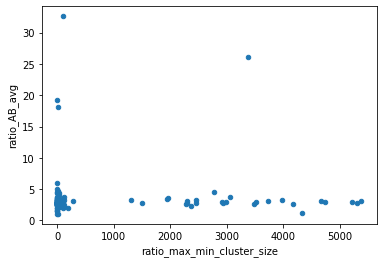

In [12]:
df_measurements.plot(x='ratio_max_min_cluster_size', y='ratio_AB_avg', kind='scatter')

<AxesSubplot:xlabel='ratio_max_min_cluster_size', ylabel='t_B_avg'>

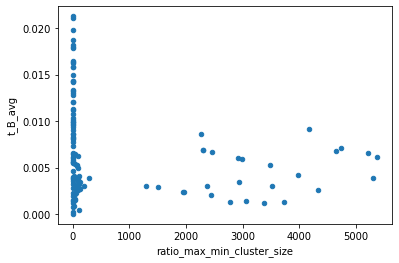

In [13]:
df_measurements.plot(x='ratio_max_min_cluster_size', y='t_B_avg', kind='scatter')

<AxesSubplot:xlabel='ratio_max_min_cluster_size', ylabel='t_A_avg'>

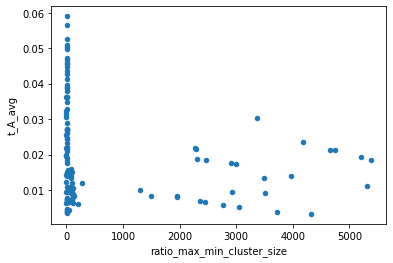

In [14]:
df_measurements.plot(x='ratio_max_min_cluster_size', y='t_A_avg', kind='scatter')

## Measurements speculated k-means

In [3]:
[X.shape for X in X_list]

[(20648, 4),
 (48204, 5),
 (89640, 5),
 (10081, 7),
 (10692, 8),
 (22784, 9),
 (59049, 10),
 (40768, 11),
 (20867, 12),
 (12455, 13)]

In [3]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    i = 0
    df_measurements_speculation = pd.DataFrame(columns=['n_datapoints', 'n_features', 'n_clusters', 't_A_avg', 't_A_min', 't_A_max', 't_B_avg', 't_B_min', 't_B_max', 'avg_cluster_size', 'min_cluster_size', 'max_cluster_size',\
                                            't_speculation_avg', 't_speculation_min', 't_speculation_max', 't_correction_avg', 't_correction_min', 't_correction_max'])
    for k, X in enumerate(X_list):
        print(f"\nProcessing {k}° dataset...")
        for K in range(3, 15):
            # Fit kmeans
            print(f"{K} -- ", end='')
            kmeans = KMeans_Speculation(X, n_clusters = K)
            A_time, B_time, speculation_time, correction_time = kmeans.fit(measure=True)
            # Get cluster size
            clusters_size = kmeans.getClustersSize()
            # Append to df
            df_measurements_speculation.loc[i] = [X.shape[0], X.shape[1], K, np.mean(A_time), np.min(A_time), np.max(A_time), np.mean(B_time),\
                                      np.min(B_time), np.max(B_time), np.nanmean(clusters_size), np.nanmin(clusters_size), np.nanmax(clusters_size),\
                                      np.mean(speculation_time), np.min(speculation_time), np.max(speculation_time), np.mean(correction_time), np.min(correction_time), np.max(correction_time)]
            i += 1
    df_measurements_speculation.to_csv('./data/measurements_speculation.csv', index=False)

Processing 0° dataset...
3 -- 4 -- 5 -- 6 -- 7 -- 8 -- 9 -- 10 -- 11 -- 12 -- 13 -- 14 -- Processing 1° dataset...
3 -- 4 -- 5 -- 6 -- 7 -- 8 -- 9 -- 10 -- 11 -- 12 -- 13 -- 14 -- Processing 2° dataset...
3 -- 4 -- 5 -- 6 -- 7 -- 8 -- 9 -- 10 -- 11 -- 12 -- 13 -- 14 -- Processing 3° dataset...
3 -- 4 -- 5 -- 6 -- 7 -- 8 -- 9 -- 10 -- 11 -- 12 -- 13 -- 14 -- Processing 4° dataset...
3 -- 4 -- 5 -- 6 -- 7 -- 8 -- 9 -- 10 -- 11 -- 12 -- 13 -- 14 -- Processing 5° dataset...
3 -- 4 -- 5 -- 6 -- 7 -- 8 -- 9 -- 10 -- 11 -- 12 -- 13 -- 14 -- Processing 6° dataset...
3 -- 4 -- 5 -- 6 -- 7 -- 8 -- 9 -- 10 -- 11 -- 12 -- 13 -- 14 -- Processing 7° dataset...
3 -- 4 -- 5 -- 6 -- 7 -- 8 -- 9 -- 10 -- 11 -- 12 -- 13 -- 14 -- Processing 8° dataset...
3 -- 4 -- 5 -- 6 -- 7 -- 8 -- 9 -- 10 -- 11 -- 12 -- 13 -- 14 -- Processing 9° dataset...
3 -- 4 -- 5 -- 6 -- 7 -- 8 -- 9 -- 10 -- 11 -- 12 -- 13 -- 14 -- 

In [4]:
df_measurements_speculation['ratio_AB_avg'] = df_measurements_speculation['t_A_avg']/df_measurements_speculation['t_B_avg']
df_measurements_speculation['ratio_AB_max'] = df_measurements_speculation['t_A_max']/df_measurements_speculation['t_B_max']
df_measurements_speculation['ratio_AB_min'] = df_measurements_speculation['t_A_min']/df_measurements_speculation['t_B_min']

<AxesSubplot:>

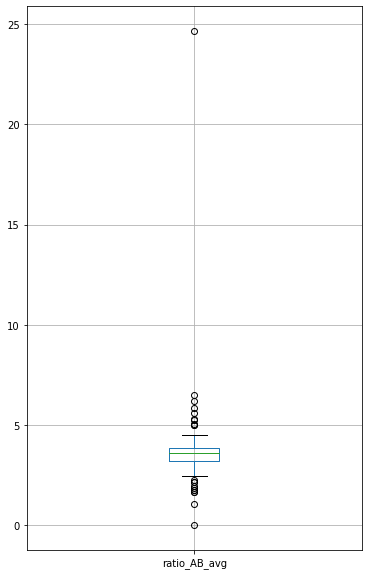

In [27]:
df_measurements_speculation[['ratio_AB_avg', 'ratio_AB_max']][(df_measurements_speculation[['ratio_AB_avg', 'ratio_AB_max']] != np.inf).any(axis=1)].boxplot(column=['ratio_AB_avg'],figsize=(6,10))

array([[<AxesSubplot:title={'center':'t_A_avg'}>,
        <AxesSubplot:title={'center':'t_B_avg'}>],
       [<AxesSubplot:title={'center':'t_correction_avg'}>,
        <AxesSubplot:>]], dtype=object)

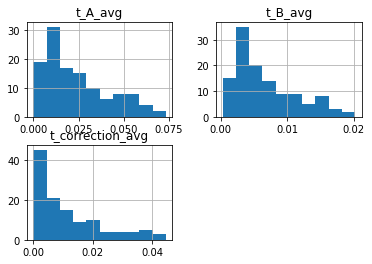

In [7]:
df_measurements_speculation.hist(column=['t_A_avg', 't_B_avg', 't_correction_avg'])

In [8]:
df_measurements_speculation['ratio_B_correction_avg'] = df_measurements_speculation['t_B_avg']/df_measurements_speculation['t_correction_avg']

<AxesSubplot:>

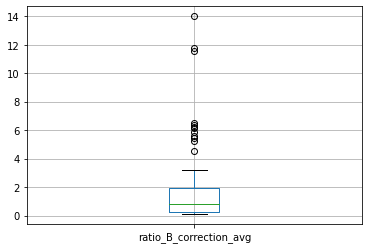

In [23]:
df_measurements_speculation[(df_measurements_speculation[['ratio_B_correction_avg']] != np.inf).any(axis=1)].boxplot(column=['ratio_B_correction_avg'])

In [22]:
df_measurements_speculation['ratio_B_correction_avg'][(df_measurements_speculation[['ratio_B_correction_avg']] != np.inf).any(axis=1)].b()

1.6301748633940887

## Measurements basic k-means - refactor

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    i = 0
    df_measurements = pd.DataFrame(columns=['n_datapoints', 'n_features', 'n_clusters', 't_A_avg', 't_A_min', 't_A_max', 't_B_avg', 't_B_min', 't_B_max', 'avg_cluster_size', 'min_cluster_size', 'max_cluster_size'])
    for k, X in enumerate(X_list):
        print(f"Processing {k}° dataset...")
        for K in range(3, 15):
            # Fit kmeans
            labels, centroids, A_time, B_time = KMeans_fast_refactor(X, K, num_iter=100, measure=True)
            # Get cluster size
            clusters_size = np.array([X[labels == k].shape[0] for k in range(K)])
            # Append to df
            df_measurements.loc[i] = [X.shape[0], X.shape[1], K, np.mean(A_time), np.min(A_time), np.max(A_time), np.mean(B_time), np.min(B_time), np.max(B_time), np.nanmean(clusters_size), np.nanmin(clusters_size), np.nanmax(clusters_size)]
            i += 1
    df_measurements.to_csv('./data/measurements.csv', index=False)

Processing 0° dataset...
Processing 1° dataset...


In [4]:
df_measurements['ratio_AB_avg'] = df_measurements['t_A_avg']/df_measurements['t_B_avg']
df_measurements['ratio_AB_max'] = df_measurements['t_A_max']/df_measurements['t_B_max']
df_measurements['ratio_AB_min'] = df_measurements['t_A_min']/df_measurements['t_B_min']

<AxesSubplot:>

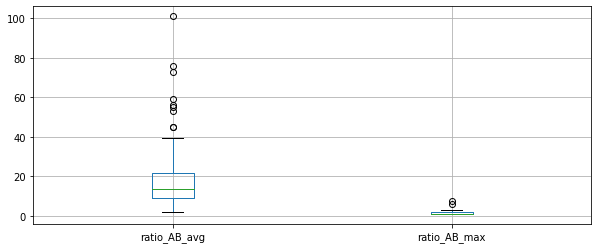

In [15]:
df_measurements[['ratio_AB_avg', 'ratio_AB_max']][(df_measurements[['ratio_AB_avg', 'ratio_AB_max']] != np.inf).any(axis=1)].boxplot(column=['ratio_AB_avg', 'ratio_AB_max'], figsize=(10,4))

<AxesSubplot:xlabel='n_clusters', ylabel='ratio_AB_avg'>

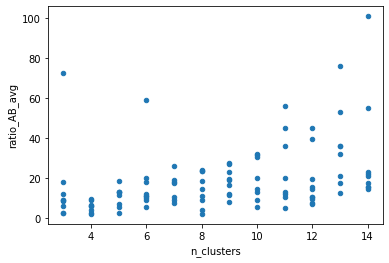

In [6]:
df_measurements.plot(x='n_clusters', y='ratio_AB_avg', kind='scatter')

<AxesSubplot:xlabel='avg_cluster_size', ylabel='ratio_AB_avg'>

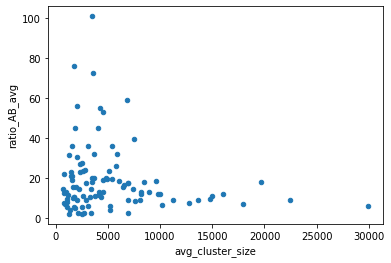

In [7]:
df_measurements.plot(x='avg_cluster_size', y='ratio_AB_avg', kind='scatter')

<AxesSubplot:xlabel='n_features', ylabel='ratio_AB_avg'>

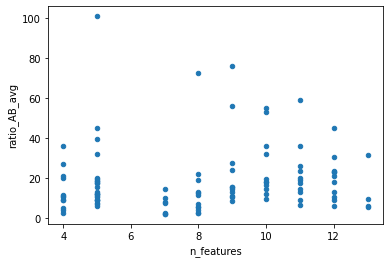

In [8]:
df_measurements.plot(x='n_features', y='ratio_AB_avg', kind='scatter')

In [9]:
df_measurements

,n_datapoints,n_features,n_clusters,t_A_avg,t_A_min,t_A_max,t_B_avg,t_B_min,t_B_max,avg_cluster_size,min_cluster_size,max_cluster_size,ratio_AB_avg,ratio_AB_max,ratio_AB_min
0,20648.0,4.0,3.0,0.003986,0.0,0.008971,0.001468,0.0,0.008031,6882.666667,383.0,16698.0,2.715492,1.117121,NaN
1,20648.0,4.0,4.0,0.002106,0.0,0.013546,0.000552,0.0,0.008014,5162.000000,383.0,16117.0,3.813793,1.690189,NaN
2,20648.0,4.0,5.0,0.002988,0.0,0.015672,0.000257,0.0,0.015674,4129.600000,382.0,15296.0,11.627550,0.999833,NaN
3,20648.0,4.0,6.0,0.003125,0.0,0.015661,0.000156,0.0,0.015621,3441.333333,322.0,10286.0,20.005434,1.002610,NaN
4,20648.0,4.0,7.0,0.003597,0.0,0.015861,0.000396,0.0,0.015660,2949.714286,93.0,8794.0,9.072200,1.012850,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,12455.0,13.0,10.0,0.007479,0.0,0.016280,0.000237,0.0,0.015671,1245.500000,23.0,2290.0,31.496029,1.038856,NaN
116,12455.0,13.0,11.0,0.008301,0.0,0.015638,0.000000,0.0,0.000000,1132.272727,23.0,1975.0,inf,inf,NaN
117,12455.0,13.0,12.0,0.007813,0.0,0.015664,0.000823,0.0,0.015633,1037.916667,23.0,1791.0,9.497468,1.001998,NaN
118,12455.0,13.0,13.0,0.009698,0.0,0.015639,0.000000,0.0,0.000000,958.076923,23.0,1972.0,inf,inf,NaN


In [10]:
df_measurements['ratio_max_min_cluster_size'] = df_measurements['max_cluster_size']/df_measurements['min_cluster_size']
df_measurements.sort_values(['ratio_max_min_cluster_size'], ascending=False)

,n_datapoints,n_features,n_clusters,t_A_avg,t_A_min,t_A_max,t_B_avg,t_B_min,t_B_max,avg_cluster_size,min_cluster_size,max_cluster_size,ratio_AB_avg,ratio_AB_max,ratio_AB_min,ratio_max_min_cluster_size
58,10692.0,8.0,13.0,0.004919,0.000000,0.015642,0.000396,0.0,0.015618,822.461538,0.0,10692.0,12.416931,1.001542,NaN,inf
64,22784.0,9.0,7.0,0.007452,0.000000,0.015665,0.000721,0.0,0.015635,3254.857143,3.0,14840.0,10.328300,1.001876,NaN,4946.666667
103,20867.0,12.0,10.0,0.011913,0.000000,0.020280,0.000391,0.0,0.015635,2086.700000,1.0,4802.0,30.488143,1.297072,NaN,4802.000000
104,20867.0,12.0,11.0,0.012784,0.000000,0.015688,0.000284,0.0,0.015617,1897.000000,1.0,4581.0,45.024473,1.004565,NaN,4581.000000
48,10692.0,8.0,3.0,0.004296,0.000000,0.010553,0.000059,0.0,0.001357,3564.000000,2.0,8657.0,72.829204,7.777719,NaN,4328.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,89640.0,5.0,7.0,0.017441,0.000000,0.031280,0.002383,0.0,0.015645,12805.714286,12700.0,12891.0,7.318243,1.999345,NaN,1.015039
29,89640.0,5.0,8.0,0.024137,0.015584,0.046877,0.002718,0.0,0.015647,11205.000000,11149.0,11296.0,8.878990,2.995947,inf,1.013185
26,89640.0,5.0,5.0,0.013951,0.000000,0.016434,0.002038,0.0,0.015636,17928.000000,17895.0,17953.0,6.844503,1.051019,NaN,1.003241
24,89640.0,5.0,3.0,0.010941,0.000000,0.019699,0.001756,0.0,0.015633,29880.000000,29828.0,29907.0,6.229942,1.260108,NaN,1.002649


<AxesSubplot:xlabel='ratio_max_min_cluster_size', ylabel='ratio_AB_avg'>

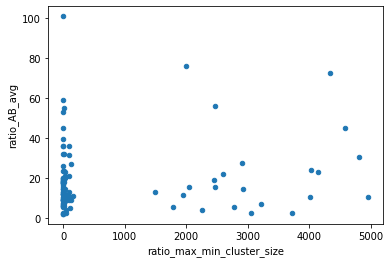

In [11]:
df_measurements.plot(x='ratio_max_min_cluster_size', y='ratio_AB_avg', kind='scatter')

<AxesSubplot:xlabel='ratio_max_min_cluster_size', ylabel='t_B_avg'>

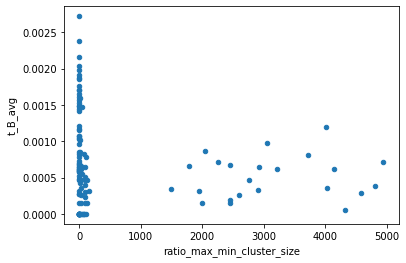

In [12]:
df_measurements.plot(x='ratio_max_min_cluster_size', y='t_B_avg', kind='scatter')

<AxesSubplot:xlabel='ratio_max_min_cluster_size', ylabel='t_A_avg'>

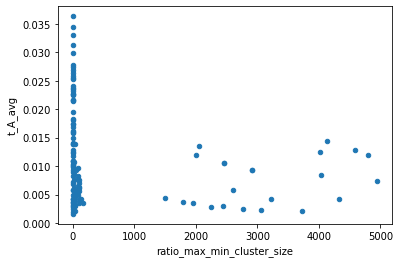

In [13]:
df_measurements.plot(x='ratio_max_min_cluster_size', y='t_A_avg', kind='scatter')